In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import seaborn as sns
import statistics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [88]:
#We want to import this here because we want to be able to see all the columns
#and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [89]:
df = pd.read_csv('used_cars_data.csv')

C:\Users\VBarron\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Dropping Features

In [91]:
#Features that correspond to the dealership
df.drop(columns=['listing_id', 'longitude', 'main_picture_url'], inplace=True)
df.drop(columns=['franchise_make', 'is_cpo', 'is_oemcpo', 'is_new','sp_name'], inplace=True)
df.drop(columns=['seller_rating', 'sp_id', 'latitude', 'listed_date', 'major_options'], inplace=True)
df.drop(columns=['dealer_zip', 'description', 'is_certified', 'franchise_dealer', 'daysonmarket'], inplace=True)

#Features that are Truck specific
df.drop(columns=['cabin','bed', 'bed_height', 'bed_length'], inplace=True)

#Duplicate Features
df.drop(columns=['transmission_display', 'trimId','wheel_system_display'], inplace=True)
df.drop(columns=['highway_fuel_economy','power', 'city_fuel_economy'], inplace=True)
df.drop(columns=['engine_cylinders', 'exterior_color'], inplace=True)

#Features that a common customer may not know
df.drop(columns=['wheelbase', 'width'], inplace=True)
df.drop(columns=['back_legroom', 'front_legroom', 'height', 'length'], inplace=True)
df.drop(columns=['engine_displacement','fuel_tank_volume', 'torque' ], inplace=True)

#Completly Null
df.drop(columns=['vehicle_damage_category', 'combine_fuel_economy', 'savings_amount'], inplace=True)

#we decided to drop VIN because the vehicle identification number is a number that is uniquly given to every vehicle
#this feature will not help determine the price
df.drop(columns=['vin'], inplace=True)

#After further analysis, we decided to drop interior color due the the amount of unique values that are in the dataset
#for this feature. We may later on come back and attempt to resolve this data
df.drop(columns=['interior_color'], inplace=True)

In [92]:
print(df.shape)

(3000040, 22)


In [93]:
df.head(5)

,body_type,city,engine_type,fleet,frame_damaged,fuel_type,has_accidents,horsepower,isCab,listing_color,make_name,maximum_seating,mileage,model_name,owner_count,price,salvage,theft_title,transmission,trim_name,wheel_system,year
0,SUV / Crossover,Bayamon,I4,NaN,NaN,Gasoline,NaN,177.0,NaN,YELLOW,Jeep,5 seats,7.0,Renegade,NaN,23141.0,NaN,NaN,A,Latitude FWD,FWD,2019
1,SUV / Crossover,San Juan,I4,NaN,NaN,Gasoline,NaN,246.0,NaN,BLACK,Land Rover,7 seats,8.0,Discovery Sport,NaN,46500.0,NaN,NaN,A,S AWD,AWD,2020
2,Sedan,Guaynabo,H4,False,False,Gasoline,False,305.0,False,UNKNOWN,Subaru,5 seats,NaN,WRX STI,3.0,46995.0,False,False,M,Base,AWD,2016
3,SUV / Crossover,San Juan,V6,NaN,NaN,Gasoline,NaN,340.0,NaN,GRAY,Land Rover,7 seats,11.0,Discovery,NaN,67430.0,NaN,NaN,A,V6 HSE AWD,AWD,2020
4,SUV / Crossover,San Juan,I4,NaN,NaN,Gasoline,NaN,246.0,NaN,BLACK,Land Rover,7 seats,7.0,Discovery Sport,NaN,48880.0,NaN,NaN,A,S AWD,AWD,2020


# Cleaning Null Values

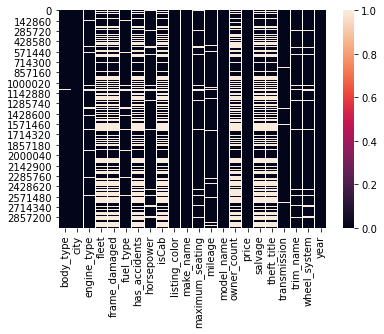

In [94]:
sns.heatmap(data=df.isnull());

In [95]:
print(df.isna().sum())

body_type            13543
city                     0
engine_type         100581
fleet              1426595
frame_damaged      1426595
fuel_type            82724
has_accidents      1426595
horsepower          172386
isCab              1426595
listing_color            0
make_name                0
maximum_seating     159269
mileage             144387
model_name               0
owner_count        1517013
price                    0
salvage            1426595
theft_title        1426595
transmission         64185
trim_name           116294
wheel_system        146732
year                     0
dtype: int64


In [96]:
print(df.shape)

(3000040, 22)


In [97]:
#These features are important and we cannot assume these features based on 
#other data as this can be trivial
#Dropped 1,607,545 Rows

indexNames = df[ df['frame_damaged'].isnull()].index
df.drop(indexNames, inplace=True)

indexNames = df[ df['trim_name'].isnull()].index
df.drop(indexNames, inplace=True)

indexNames = df[ df['transmission'].isnull()].index
df.drop(indexNames, inplace=True)

indexNames = df[ df['engine_type'].isnull()].index
df.drop(indexNames, inplace=True)

indexNames = df[ df['owner_count'].isnull()].index
df.drop(indexNames, inplace=True)

indexNames = df[ df['body_type'].isnull()].index
df.drop(indexNames, inplace=True)

indexNames = df[ df['wheel_system'].isnull()].index
df.drop(indexNames, inplace=True)

In [98]:
print(df.isna().sum())

body_type             0
city                  0
engine_type           0
fleet                 0
frame_damaged         0
fuel_type             0
has_accidents         0
horsepower         5426
isCab                 0
listing_color         0
make_name             0
maximum_seating    8209
mileage            8962
model_name            0
owner_count           0
price                 0
salvage               0
theft_title           0
transmission          0
trim_name             0
wheel_system          0
year                  0
dtype: int64


In [99]:
print(df.shape)

(1392625, 22)


# Checking for outliers

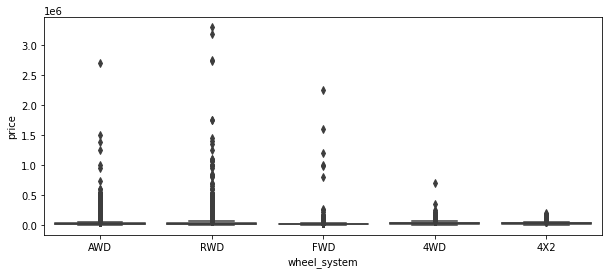

In [100]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="wheel_system", y="price", data=df); 

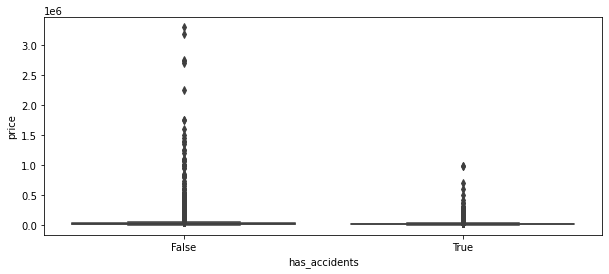

In [101]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="has_accidents", y="price", data=df); 

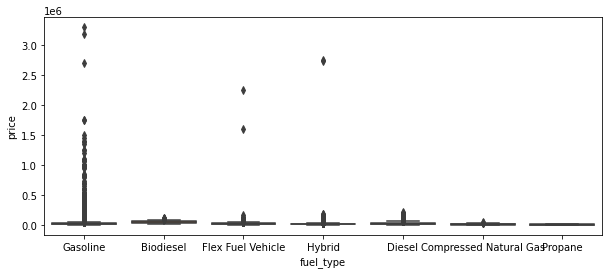

In [102]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="fuel_type", y="price", data=df); 

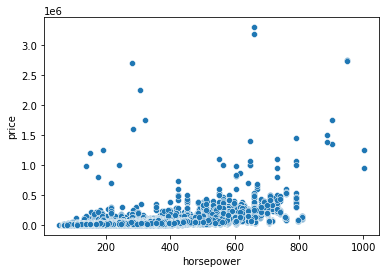

In [103]:
sns.scatterplot(x="horsepower", y="price", data=df); 

In [104]:
#Based on the previous graphs it is very apparent that price has a lot of outliers in a lot of features
#We dont want to remove a lot of data but we want the data to be cleaner. Lets see how many values are above
# 90,000
print(df[df['price'] > 90000].shape)

(5096, 22)


In [105]:
#We have 5,096 rows in that range which is not large when compared to the overall size of our data
#Lets drop all rows that are above the 90,000 price range and check out our graphs
indexNames = df[df['price'] > 90000].index
df.drop(indexNames, inplace=True)

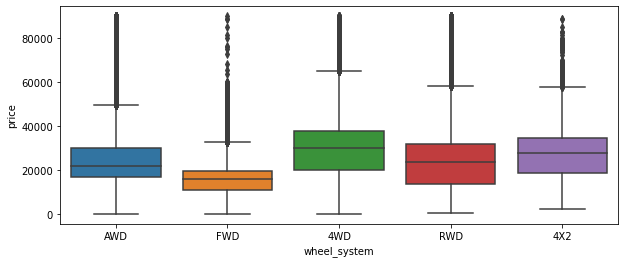

In [106]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="wheel_system", y="price", data=df); 

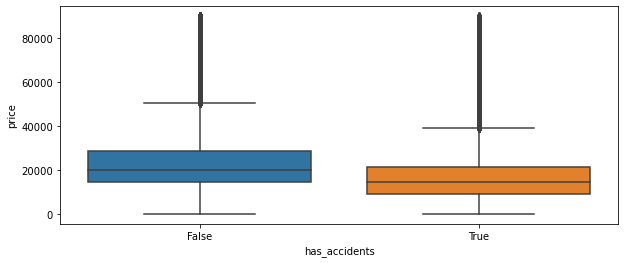

In [107]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="has_accidents", y="price", data=df); 

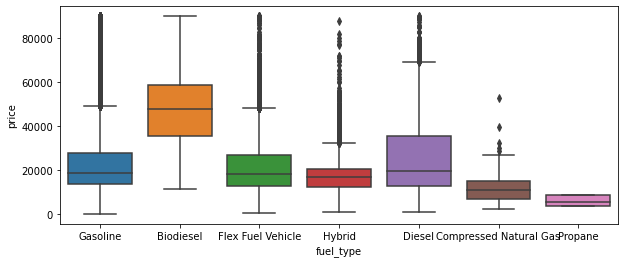

In [108]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="fuel_type", y="price", data=df); 

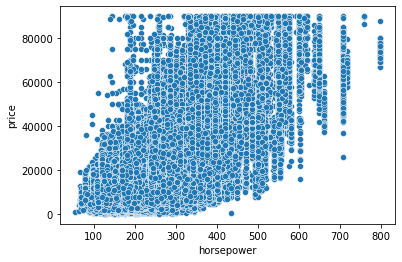

In [109]:
sns.scatterplot(x="horsepower", y="price", data=df); 

In [110]:
#Are graphs are so much cleaner and even on our scatter plot we can see there is a positive correlation
#Although we do still have outliers in our data its not out of range with the overall dataset
#We also do not want to go to a lower range in price because we do have biodesiel vehicles in our dataset

In [112]:
#We seem to have an abundant amount of cities which we should remove the ones
#that dont have enough records for. We want to have as much records as we can
#but we dont want the ones that have too little. So lets go ahead
#and drop the rows for those cities that have less then 100 records
df['city'].value_counts()

Houston                          19211
San Antonio                       9905
Columbus                          8757
Miami                             8461
Jacksonville                      7843
Orlando                           7810
Phoenix                           7584
Dallas                            7330
Stafford                          7245
Las Vegas                         7104
Denver                            7028
Tampa                             6986
Indianapolis                      6928
Tucson                            6016
Raleigh                           6010
Austin                            5867
Charlotte                         5473
Sacramento                        5354
Cincinnati                        5318
Springfield                       5201
Columbia                          5160
Louisville                        5152
Marietta                          4854
Oklahoma City                     4751
El Paso                           4537
Chicago                  

In [113]:
df = df.groupby('city').filter(lambda x : len(x)>100)

In [134]:
df = df.groupby('make_name').filter(lambda x : len(x)>30)

In [114]:
#This is great we still have a lot of cities but we reduced the amount we had
#This is good as the cities that we dont have a lot of information on may affect
#our scores negatively
df['city'].value_counts()

Houston                          19211
San Antonio                       9905
Columbus                          8757
Miami                             8461
Jacksonville                      7843
Orlando                           7810
Phoenix                           7584
Dallas                            7330
Stafford                          7245
Las Vegas                         7104
Denver                            7028
Tampa                             6986
Indianapolis                      6928
Tucson                            6016
Raleigh                           6010
Austin                            5867
Charlotte                         5473
Sacramento                        5354
Cincinnati                        5318
Springfield                       5201
Columbia                          5160
Louisville                        5152
Marietta                          4854
Oklahoma City                     4751
El Paso                           4537
Chicago                  

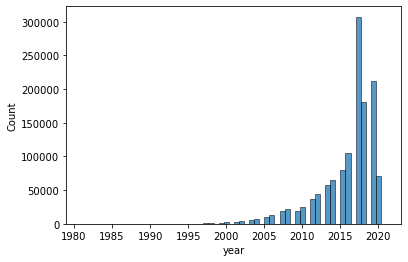

In [116]:
#We can confidently say that this model can be used to determine the price of vehicles that are
#in the post 2000 year range. We have data from 1980 to 2021 but most of our data is in the post 2000 range
#We want to keep this data because we want to still be able to predict the value of older vehicles
#ie for vintage or restored cars
sns.histplot(data=df, x="year", bins=60);

In [117]:
print(df.isna().sum())

body_type             0
city                  0
engine_type           0
fleet                 0
frame_damaged         0
fuel_type             0
has_accidents         0
horsepower         4767
isCab                 0
listing_color         0
make_name             0
maximum_seating    7151
mileage            8166
model_name            0
owner_count           0
price                 0
salvage               0
theft_title           0
transmission          0
trim_name             0
wheel_system          0
year                  0
dtype: int64


# Replacing Unkown Value / Replacing Strings

In [118]:
#Here we want to replace the nan with the mode of the maximum seating of the model_name associated with it
#We are doing this because we want to minimize the amount of rows we drop and these features are typically
#associated with each other
indexes = df[df['maximum_seating'].isnull()].index
for index in indexes:
    model_name = df.loc[index]['model_name']
    seat_num = statistics.mode(df[df['model_name'] == model_name]['maximum_seating'])
    df.loc[index,'maximum_seating'] = seat_num

In [119]:
df['maximum_seating'].value_counts()

5 seats     859517
7 seats     151999
6 seats     110778
8 seats      92546
4 seats      48253
2 seats      15943
3 seats       8412
15 seats      3964
9 seats       2540
12 seats       880
--             376
10 seats       195
Name: maximum_seating, dtype: int64

In [120]:
#We want to go ahead and try to replace all the values that are set to '--' to their correct seating
#Replacing these will help us later when converting it into a int or numerical
indexes = df[df['maximum_seating'] == '--'].index
for index in indexes:
    model = df.loc[index]['model_name']
    seats = statistics.mode(df[df['model_name'] == model]['maximum_seating'])
    if seats == '--':
        continue
    df.loc[index,'maximum_seating'] = seats
    
#After the loop we will delete the rows remaining that have '--' as it wont help us with our model
indexNames = df[ df['maximum_seating'] == '--'].index
df.drop(indexNames, inplace=True)

#Lets remove the word seats from the string 
df['maximum_seating'].replace(to_replace='seats',value=' ' , inplace=True, regex=True)

In [121]:
df['maximum_seating'].value_counts()

5       859823
7       152013
6       110803
8        92546
4        48256
2        15947
3         8412
15        3964
9         2540
12         880
10         195
Name: maximum_seating, dtype: int64

In [122]:
#This is great we were able to fill in 6,639 Rows of the missing values
print(df.isna().sum())

body_type             0
city                  0
engine_type           0
fleet                 0
frame_damaged         0
fuel_type             0
has_accidents         0
horsepower         4767
isCab                 0
listing_color         0
make_name             0
maximum_seating     512
mileage            8166
model_name            0
owner_count           0
price                 0
salvage               0
theft_title           0
transmission          0
trim_name             0
wheel_system          0
year                  0
dtype: int64


In [124]:
#Here we want to replace the nan with the mode of the horsepower associated with the model_name
#These features are also typically associated with each other
indexes = df[df['horsepower'].isnull()].index
for index in indexes:
    model_name = df.loc[index]['model_name']
    mode_pow = statistics.mode(df[df['model_name'] == model_name]['horsepower'])
    df.loc[index,'horsepower'] = mode_pow

In [125]:
#This is great we were able to replace the missing values for 4,688 rows
print(df.isna().sum())

body_type             0
city                  0
engine_type           0
fleet                 0
frame_damaged         0
fuel_type             0
has_accidents         0
horsepower           79
isCab                 0
listing_color         0
make_name             0
maximum_seating     512
mileage            8166
model_name            0
owner_count           0
price                 0
salvage               0
theft_title           0
transmission          0
trim_name             0
wheel_system          0
year                  0
dtype: int64


In [126]:
#Here we want to replace nan with the mean that is typically associated of the year of the vehicles
#We want to use mean here instead of mode because we want to keep the mean of the data in this feature
#the same The amount of miles is strongly correlated to the year it was made.
indexes = df[df['mileage'].isnull()].index
for index in indexes:
    year = df.loc[index]['year']
    mile_avg = np.nanmean(df[df['year'] == year]['mileage'])
    df.loc[index,'mileage'] = mile_avg

In [127]:
#This is great we were able to replace the nan in all the missing values in this feature.
print(df.isna().sum())

body_type            0
city                 0
engine_type          0
fleet                0
frame_damaged        0
fuel_type            0
has_accidents        0
horsepower          79
isCab                0
listing_color        0
make_name            0
maximum_seating    512
mileage              0
model_name           0
owner_count          0
price                0
salvage              0
theft_title          0
transmission         0
trim_name            0
wheel_system         0
year                 0
dtype: int64


In [128]:
#We were able to successfully recover some of our data but we are still left with some nan
#Lets go ahead and drop the remainder as it wont make a big difference to our dataset and because
#We cannot pull anymore information from other features to replace these.

indexNames = df[ df['maximum_seating'].isnull()].index
df.drop(indexNames, inplace=True)

indexNames = df[ df['horsepower'].isnull()].index
df.drop(indexNames, inplace=True)

In [129]:
#Great we have now completly removed all the nan values in our dataset
print(df.isna().sum())

body_type          0
city               0
engine_type        0
fleet              0
frame_damaged      0
fuel_type          0
has_accidents      0
horsepower         0
isCab              0
listing_color      0
make_name          0
maximum_seating    0
mileage            0
model_name         0
owner_count        0
price              0
salvage            0
theft_title        0
transmission       0
trim_name          0
wheel_system       0
year               0
dtype: int64


In [130]:
#Although visually we removed all the null from our dataset, I further analyized the remaining features and found listing_color
#has a value called "UNKNOWN" since this value is also trivial and we cannot extract value from other features lets remove theses rows

indexNames = df[ df['listing_color'] == "UNKNOWN"].index
df.drop(indexNames, inplace=True)

# Correlations

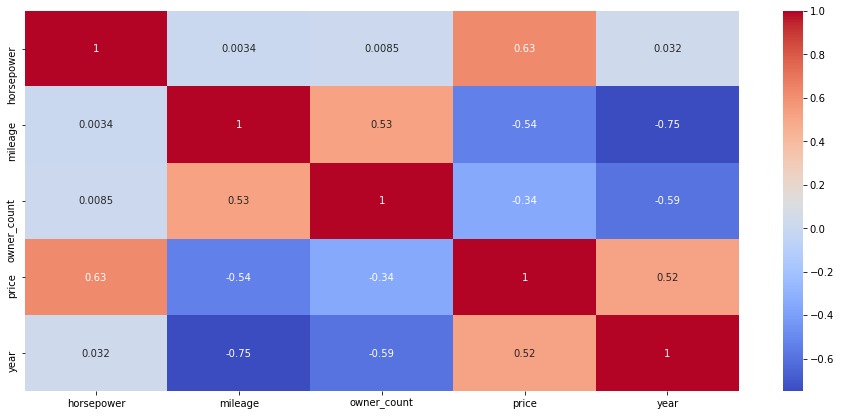

In [131]:
#Now that we have removed all nulls lets check out the correlation between some features
plt.figure(figsize=(16, 7))
sns.heatmap(data=df.corr(), cmap='coolwarm', annot=True);

# Impute

In [33]:
#We dont seem to have all our data in the right format to put into a model so lets go ahead and
#start making some changes to get these features into a numerical format
df.dtypes

Unnamed: 0           int64
body_type           object
city                object
engine_type         object
fleet                int64
frame_damaged        int64
fuel_type           object
has_accidents        int64
horsepower         float64
isCab                int64
listing_color       object
make_name           object
maximum_seating      int64
mileage            float64
model_name          object
owner_count        float64
price              float64
salvage              int64
theft_title          int64
transmission        object
trim_name           object
wheel_system        object
year                 int64
dtype: object

In [133]:
#save data as CSV

In [ ]:
#Now lets change the categorical features into float or int
le = LabelEncoder()
df['fleet'] = le.fit_transform(df['fleet'])
df['frame_damaged'] = le.fit_transform(df['frame_damaged'])
df['has_accidents'] = le.fit_transform(df['has_accidents'])
df['salvage'] = le.fit_transform(df['salvage'])
df['theft_title'] = le.fit_transform(df['theft_title'])
df['isCab'] = le.fit_transform(df['isCab'])

df['maximum_seating'] = pd.to_numeric(df['maximum_seating'])

In [60]:
df.to_csv("clean_used_cars.csv")

In [50]:
df = pd.read_csv("clean_used_cars.csv")

In [54]:
df = df.drop(columns=["Unnamed: 0"])

In [55]:
df.head()

,body_type,city,engine_type,fleet,frame_damaged,fuel_type,has_accidents,horsepower,isCab,listing_color,...,mileage,model_name,owner_count,price,salvage,theft_title,transmission,trim_name,wheel_system,year
0,Sedan,Bay Shore,I4,0,0,Gasoline,0,201.0,0,BLACK,...,30707.0,Elantra,1.0,13324.0,0,0,A,Sport Sedan FWD,FWD,2017
1,Sedan,Bay Shore,I4,1,0,Gasoline,0,160.0,1,SILVER,...,42394.0,Malibu,1.0,14639.0,0,0,A,LT FWD,FWD,2018
2,Coupe,Bronx,V6,0,0,Gasoline,0,311.0,0,BLACK,...,62251.0,RC 350,1.0,32000.0,0,0,A,AWD,AWD,2018
3,SUV / Crossover,Bay Shore,V6,0,0,Gasoline,0,310.0,0,SILVER,...,36410.0,Traverse,1.0,23723.0,0,0,A,LT Cloth FWD,FWD,2018
4,SUV / Crossover,Bay Shore,V6,0,0,Gasoline,1,281.0,0,SILVER,...,36055.0,Traverse,1.0,22422.0,0,0,A,1LT AWD,AWD,2017


In [58]:
df['trim_name'] = le.fit_transform(df['trim_name'])
df['city'] = le.fit_transform(df['city'])

#For features that have more then 2 categorical features we want to use pandas get_dummies and append it
#to the dataframe
dummy = pd.get_dummies(df['body_type'])
df = pd.concat([df, dummy], axis=1)
df.drop(columns=['body_type'], inplace=True)

dummy = pd.get_dummies(df['wheel_system'])
df = pd.concat([df, dummy], axis=1)
df.drop(columns=['wheel_system'], inplace=True)

dummy = pd.get_dummies(df['listing_color'])
df = pd.concat([df, dummy], axis=1)
df.drop(columns=['listing_color'], inplace=True)

dummy = pd.get_dummies(df['transmission'])
df = pd.concat([df, dummy], axis=1)
df.drop(columns=['transmission'], inplace=True)

dummy = pd.get_dummies(df['make_name'])
df = pd.concat([df, dummy], axis=1)
df.drop(columns=['make_name'], inplace=True)

dummy = pd.get_dummies(df['engine_type'])
df = pd.concat([df, dummy], axis=1)
df.drop(columns=['engine_type'], inplace=True)

dummy = pd.get_dummies(df['fuel_type'])
df = pd.concat([df, dummy], axis=1)
df.drop(columns=['fuel_type'], inplace=True)

dummy = pd.get_dummies(df['model_name'])
df = pd.concat([df, dummy], axis=1)
df.drop(columns=['model_name'], inplace=True)
#body_type, city,   fuel_type, wheel_system, listing_color, transmission

#has a lot of categories
#interior_color(16,362 some are very unique)!!! DROPPING !!!
#trim_name(7937 some near the end are very unique) !!! LABELENCODER !!!
#make_name(62 values)!!! DUMMIES !!!
#engine_type(roughly 37 unique) !!! DUMMIES !!!

In [63]:
df.dtypes

city                            int32
fleet                           int32
frame_damaged                   int32
has_accidents                   int32
horsepower                    float64
isCab                           int32
maximum_seating                 int64
mileage                       float64
owner_count                   float64
price                         float64
salvage                         int32
theft_title                     int32
trim_name                       int32
year                            int64
Convertible                     uint8
Coupe                           uint8
Hatchback                       uint8
Minivan                         uint8
Pickup Truck                    uint8
SUV / Crossover                 uint8
Sedan                           uint8
Van                             uint8
Wagon                           uint8
4WD                             uint8
4X2                             uint8
AWD                             uint8
FWD         

In [64]:
df.head()

,city,fleet,frame_damaged,has_accidents,horsepower,isCab,maximum_seating,mileage,owner_count,price,salvage,theft_title,trim_name,year,Convertible,Coupe,Hatchback,Minivan,Pickup Truck,SUV / Crossover,Sedan,Van,Wagon,4WD,4X2,AWD,FWD,RWD,BLACK,BLUE,BROWN,GOLD,GRAY,GREEN,ORANGE,PINK,PURPLE,RED,SILVER,TEAL,WHITE,YELLOW,A,CVT,Dual Clutch,M,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,Chrysler,Dodge,FIAT,Ferrari,Ford,GMC,Genesis,Honda,Hummer,Hyundai,INFINITI,Isuzu,Jaguar,Jeep,Kia,Land Rover,Lexus,Lincoln,Lotus,MINI,Maserati,Mazda,Mercedes-Benz,Mercury,Mitsubishi,Nissan,Oldsmobile,Plymouth,Pontiac,Porsche,RAM,Saab,Saturn,Scion,Subaru,Suzuki,Toyota,Volkswagen,Volvo,smart,H4,H4 Hybrid,H6,I2,I3,I3 Hybrid,I4,I4 Compressed Natural Gas,I4 Diesel,I4 Flex Fuel Vehicle,I4 Hybrid,I5,I5 Biodiesel,I5 Diesel,I6,I6 Diesel,I6 Hybrid,R2,V10,V10 Diesel,V12,V6,V6 Biodiesel,V6 Compressed Natural Gas,V6 Diesel,V6 Flex Fuel Vehicle,V6 Hybrid,V8,V8 Biodiesel,V8 Compressed Natural Gas,V8 Diesel,V8 Flex Fuel Vehicle,V8 Hybrid,V8 Propane,W12,W12 Flex Fuel Vehicle,W8,Biodiesel,Compressed Natural Gas,Diesel,Flex Fuel Vehicle,Gasoline,Hybrid,Propane,1 Series,124 Spider,1500,190-Class,1M,2 Series,200,200SX,240,240SX,2500,3 Series,3 Series Gran Turismo,300,300-Class,3000GT,300M,300ZX,3500,3500 Chassis,350Z,360,360 Spider,370Z,380-Class,4 Series,400,400-Class,420-Class,4500 Chassis,456M,4C,4Runner,5 Series,5 Series Gran Turismo,500,500-Class,500L,500X,560-Class,575M,599 GTB Fiorano,6 Series,6 Series Gran Turismo,612 Scaglietti,626,7 Series,718 Boxster,718 Cayman,740,8 Series,850,86,9-2X,9-3,9-3 SportCombi,9-4X,9-5,9-5 SportCombi,9-7X,900,911,924,928,940,944,960,968,A-Class,A3,A3 Sportback,A4,A4 Allroad,A4 Avant,A5,A5 Sportback,A6,A6 Allroad,A7,A8,AMG GT,ATS,ATS Coupe,ATS-V,ATS-V Coupe,Acadia,Accent,Acclaim,Accord,Accord Coupe,Accord Crosstour,Accord Hybrid,Accord Hybrid Plug-In,Achieva,ActiveHybrid 3,ActiveHybrid 5,ActiveHybrid 7,Aerio,Aerostar,Alero,Allante,Allroad,Altima,Altima Coupe,Altima Hybrid,Amanti,Amigo,Armada,Arnage,Arteon,Ascender,Ascent,Aspen,Aspire,Astra,Astro,Astro Cargo,Atlas,Atlas Cross Sport,Aura,Aurora,Avalanche,Avalon,Avalon Hybrid,Avenger,Aveo,Aviator,Axiom,Azera,Aztek,Azure,B-Series,B9 Tribeca,BRZ,Baja,Beetle,Beretta,Blackwood,Blazer,Bonneville,Borrego,Boxster,Bravada,Breeze,Bronco II,Brougham,C-Class,C-HR,C-Max Energi,C-Max Hybrid,C/K 10,C/K 1500,C/K 2500,C/K 2500 Series,C/K 3500,C/K 3500 Series,C/V,C30,C70,CC,CJ-5,CJ-7,CJ-8,CL,CL-Class,CLA-Class,CLK-Class,CLS-Class,CR-V,CR-V Hybrid,CR-Z,CT Hybrid,CT4,CT5,CT6,CT6 Hybrid Plug-In,CT6-V,CTS,CTS Coupe,CTS Sport Wagon,CTS-V,CTS-V Coupe,CTS-V Wagon,CX-3,CX-30,CX-5,CX-7,CX-9,Cabrio,Cabriolet,Cadenza,Caliber,California,Camaro,Camry,Camry Hybrid,Camry Solara,Canyon,Capri,Caprice,Captiva Sport,Caravan,Cascada,Catera,Cavalier,Cayenne,Cayenne E-Hybrid,Cayenne Hybrid,Cayman,Celica,Century,Challenger,Charger,Cherokee,Ciera,Cirrus,City Express,Civic,Civic CRX,Civic Coupe,Civic Hatchback,Civic Hybrid,Civic Type R,Civic del Sol,Clarity Hybrid Plug-In,Classic,Cobalt,Colorado,Colt,Comanche,Commander,Compass,Concorde,Conquest,Continental,Continental Flying Spur,Continental GT,Continental GTC,Continental R,Continental Supersports,Contour,Cooper,Cooper Clubman,Cooper Coupe,Cooper Paceman,Corolla,Corolla Hatchback,Corolla Hybrid,Corolla iM,Corsair,Corsica,Corvette,Cougar,Countryman,Countryman Hybrid Plug-in,Coupe,Cressida,Crossfire,Crossfire SRT-6,Crosstour,Crosstrek,Crosstrek Hybrid,Crown Victoria,Cruze,Cruze Limited,Cube,Cutlass,Cutlass Calais,Cutlass Ciera,Cutlass Supreme,DB7,DB9,DBS,DTS,Dakota,Dart,DeVille,Defender,Diamante,Diplomat,Discovery,Discovery Series II,Discovery Sport,Durango,Durango Hybrid,E-Class,E-PACE,E-Series,E-Series Chassis,ECHO,ELR,ES,ES 300,ES 300h,ES 330,ES 350,ES Hybrid,EX35,EX37,Eclipse,Eclipse Cross,Eclipse Spyder,EcoSport,Edge,Eighty-Eight,Eighty-Eight Royale,El Camino,Elantra,Elantra Coupe,Elantra GT,Elantra Touring,Eldorado,Electra,Element,Elise,Enclave,Encore

In [162]:
df.columns

Index(['city', 'fleet', 'frame_damaged', 'has_accidents', 'horsepower',
       'isCab', 'maximum_seating', 'mileage', 'owner_count', 'price',
       ...
       'i-Series', 'i3', 'i8', 'iA', 'iM', 'iQ', 'tC', 'xA', 'xB', 'xD'],
      dtype='object', length=1138)

In [65]:
X = df.drop(['price'], axis=1)
y = df['price']

print(X.shape)
print(y.shape)

(1158767, 1137)
(1158767,)


# Train Test Split

In [66]:
from sklearn.model_selection import train_test_split
import pickle
from sklearn.ensemble import GradientBoostingRegressor

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Train/Predict Models 

In [ ]:
#importing model
filename = "MLR.sav"
MLR = pickle.load(open(filename, 'rb'))

In [69]:
y_mlr_pred = MLR.predict(X_test)
print("The accuracy score of our model in train part is: ", MLR.score(X = X_train, y = y_train))
print("The accuracy score of our model on test part is: ", MLR.score(X = X_test, y = y_test))

The accuracy score of our model in train part is:  0.8690037289103703
The accuracy score of our model on test part is:  0.869627769887974


In [ ]:
#importing model
filename = "GBR.sav"
grad_reg = pickle.load(open(filename, 'rb'))

In [71]:
grad_reg = GradientBoostingRegressor(n_estimators=400, random_state=42, verbose=1)
grad_reg.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1   124310830.1696          129.28m
         2   109338169.4767          127.49m
         3    97146837.8029          128.29m
         4    86987910.8167          126.07m
         5    78551034.2984          124.11m
         6    71521397.5470          122.80m
         7    65510747.5420          122.26m
         8    60410560.2188          121.70m
         9    56194629.3981          121.82m
        10    52424303.3901          121.88m
        20    33664570.4189          116.28m
        30    27105894.9110          114.73m
        40    23802602.7168          113.37m
        50    21511648.8964          110.39m
        60    20015296.0829          107.39m
        70    18827722.9262          104.26m
        80    17912420.1319          100.80m
        90    17133536.4743           97.49m
       100    16546477.7108           94.29m
       200    13197109.3002           62.91m
       300    11632505.9492           31.34m
       40

GradientBoostingRegressor(n_estimators=400, random_state=42, verbose=1)

In [72]:
y_gbr_pred = grad_reg.predict(X_test)
print("The accuracy score of our model in train part is: ", grad_reg.score(X = X_train, y = y_train))
print("The accuracy score of our model on test part is: ", grad_reg.score(X = X_test, y = y_test))

The accuracy score of our model in train part is:  0.9261568277152188
The accuracy score of our model on test part is:  0.9258222805513384


In [73]:
#Saving GBR model

filename = 'GBR.sav'
pickle.dump(grad_reg, open(filename, 'wb'))

In [ ]:
#importing model
filename = "RFR.sav"
rfr = pickle.load(open(filename, 'rb'))

In [75]:
rfr = RandomForestRegressor(n_estimators = 300, random_state=42, n_jobs=-1,verbose=1)
rfr.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 61.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 105.9min finished


RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42, verbose=1)

In [76]:
y_rfr_pred = rfr.predict(X_test)
print("The accuracy score of our model in train part is: ", rfr.score(X = X_train, y = y_train))
print("The accuracy score of our model on test part is: ", rfr.score(X = X_test, y = y_test))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:   34.7s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:   48.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    5.1s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:   37.5s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:  1.2min finished


The accuracy score of our model in train part is:  0.9953197963292091


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    1.5s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:   20.7s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:   43.6s finished


The accuracy score of our model on test part is:  0.9658078905438898


In [77]:
#Saving RFR model
filename = 'RFR.sav'
pickle.dump(rfr, open(filename, 'wb'))

In [78]:
print('RMSE for Multiple Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_mlr_pred)))
print('RMSE for Gradient Boosting Regressor:', np.sqrt(metrics.mean_squared_error(y_test, y_gbr_pred)))
print('RMSE for Random Forest Regressor:', np.sqrt(metrics.mean_squared_error(y_test, y_rfr_pred)))

RMSE for Multiple Linear Regression: 4313.06757410925
RMSE for Gradient Boosting Regressor: 3253.347497101375
RMSE for Random Forest Regressor: 2208.801368511337


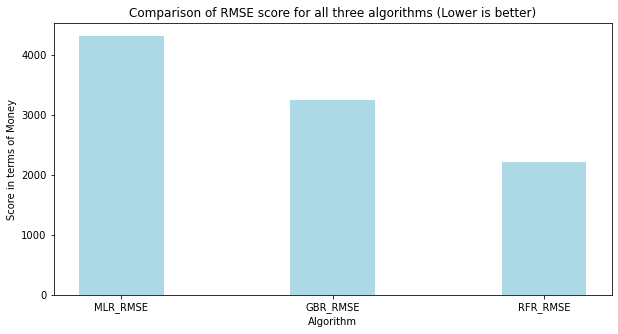

In [83]:
mlr_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_mlr_pred))
gbr_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_gbr_pred))
rfr_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_rfr_pred))

data = {'MLR_RMSE':mlr_RMSE, 'GBR_RMSE':gbr_RMSE, 'RFR_RMSE':rfr_RMSE}
RMSE_val = list(data.keys())
amount = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(RMSE_val, amount, color ='lightblue', width = 0.4)
 
plt.xlabel("Algorithm")
plt.ylabel("Score in terms of Money")
plt.title("Comparison of RMSE score for all three algorithms (Lower is better)")
plt.show()

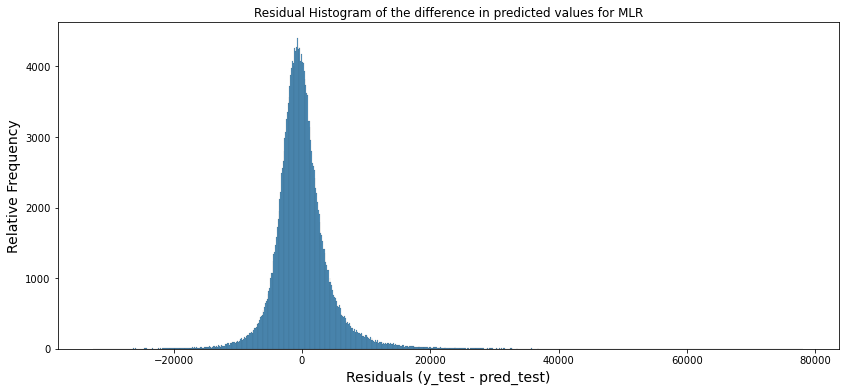

In [82]:
#This Graph shows us the distribution of residual values for our MLR
plt.figure(figsize=(14, 6))
sns.histplot(y_test - y_mlr_pred,kde=False);
plt.xlabel('Residuals (y_test - pred_test)', fontsize=14)
plt.ylabel('Relative Frequency', fontsize=14)
plt.title('Residual Histogram of the difference in predicted values for MLR');

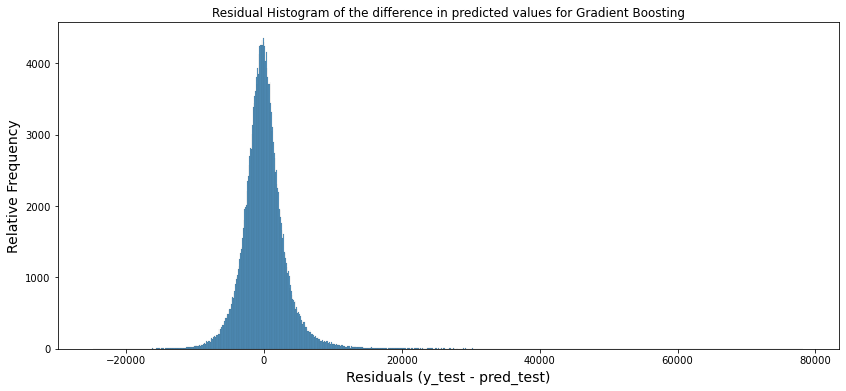

In [85]:
plt.figure(figsize=(14, 6))
sns.histplot(y_test - y_gbr_pred,kde=False);
plt.xlabel('Residuals (y_test - pred_test)', fontsize=14)
plt.ylabel('Relative Frequency', fontsize=14)
plt.title('Residual Histogram of the difference in predicted values for Gradient Boosting');

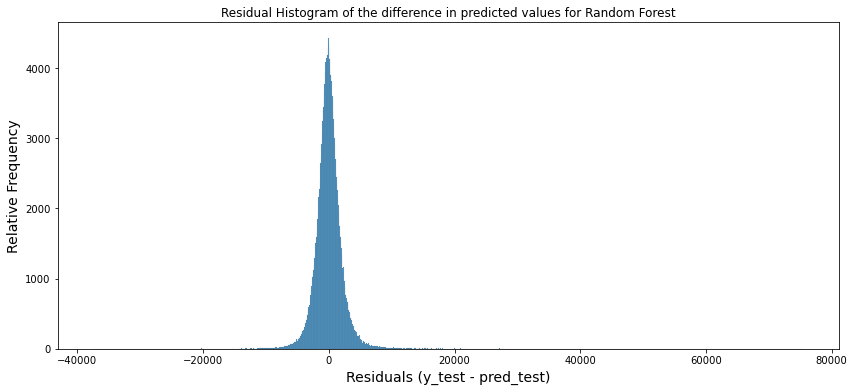

In [86]:
plt.figure(figsize=(14, 6))
sns.histplot(y_test - y_rfr_pred,kde=False);
plt.xlabel('Residuals (y_test - pred_test)', fontsize=14)
plt.ylabel('Relative Frequency', fontsize=14)
plt.title('Residual Histogram of the difference in predicted values for Random Forest');

In [ ]:
#lets drop vehicle_damage_category, is_certified, Combine_fuel_economy
#for 2 reasons, it has no correlation with any other features and most of 
#if not all of the data available is very small, we cant pull any conclutions


In [ ]:
#Removing more columns
    #bed, bed_height, bed_length, 
    #cabin(only applied for trucks, 98% null), dealer_zip(not what we need),
    #description, engine_cylinders(duplicate, same as engine_type),
    #franchise_dealer, franchise_make, is_cpo(preowned car certified, mostly null)
    #is_oemcpo(dealer certified preowned by manufacturer )
    
    #latitude, listing_date, exterior_color(listing_color is more standard)
    #listing_id, longitude, main_picture_url, major_options, power(dupicate string version of hp)
    #savings_amount, seller_rating, sp_id, torque, transmission_display, trimid, 
    #wheel_system_display, wheelbase, width

In [ ]:
#changing labels for
#body_type its in terms of strings, its best to do this in numericals
#engine_type
#listing_color

In [ ]:
#missing data
#fleet, frame_damaged, front_legroom, has_accidents, height, interior_color
#isCab(does this mean fleet), salvage, theft_title,  